In [ ]:
import nltk
import csv
import numpy as np
import codecs

In [ ]:
def load_training_data():
    with open("Spam.csv", 'r', encoding="UTF-8", errors="ignore") as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        total_list = []
        X = []
        Y = []

        for row in reader:
            # print(row)
            if row[1] == "neutral":
                continue
            else:
                # print(row[0])
                X.append(row[0])  # Message
                Y.append(row[1])  # Class
                total_list.append(row)

        classes = np.unique(Y)

        for each_class in classes:
            print(each_class)

        print((('-' * 33) + "\n") + "Length of Total List: ", len(total_list))

    return (total_list)


spam_ham = load_training_data()

Class
ham
spam
---------------------------------
Length of Total List:  5573


In [ ]:
messages = []

for (words, category) in spam_ham:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    messages.append((words_filtered, category))


def get_words_in_messages(messages):
    all_words = []

    for (words, category) in messages:
        all_words.extend(words)

    return all_words


def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()

    return word_features


def extract_features(document):
    document_words = set(document)
    features = {}

    for word in word_features:
        features["Contains: (%s)" % word] = (word in document_words)

    return features


word_features = get_word_features(get_words_in_messages(messages))
training_set = nltk.classify.apply_features(extract_features, messages)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print("RESULTS".center(90, '_') + "\n" +
      "Accuracy:" + "\t" + f"{(nltk.classify.util.accuracy(classifier, training_set)) * 100}%", end="\n\n")
classifier.show_most_informative_features(20)

print('_' * 90)

_________________________________________RESULTS__________________________________________
Accuracy:	99.1925354387224%

Most Informative Features
         Contains: (100) = True             spam : ham    =    161.3 : 1.0
      Contains: (latest) = True             spam : ham    =    148.4 : 1.0
     Contains: (message) = True            Class : ham    =     96.5 : 1.0
        Contains: (2000) = True             spam : ham    =     92.5 : 1.0
       Contains: (nokia) = True             spam : ham    =     91.2 : 1.0
       Contains: (await) = True             spam : ham    =     83.9 : 1.0
        Contains: (now!) = True             spam : ham    =     82.7 : 1.0
     Contains: (service) = True             spam : ham    =     69.5 : 1.0
       Contains: (video) = True             spam : ham    =     68.4 : 1.0
         Contains: (txt) = True             spam : ham    =     66.8 : 1.0
        Contains: (code) = True             spam : ham    =     66.7 : 1.0
    Contains: (selected) = Tr

In [ ]:
def load_test_data():
    test_messages = []
    test = codecs.open("Spamtest.txt", 'r', "UTF-8")

    for each_value in test:
        test_messages.append(each_value)

    return test_messages

In [ ]:
run_messages = load_test_data()  # Load test file containing messages only i.e. without lab...
spam_count = 0
ham_count = 0

for each_messages in run_messages:
    values = classifier.classify(extract_features(each_messages.split()))

    # Un-comment below, to dislay texts:
    print("Message: ", each_messages, " : ", values)

    if values == "ham":
        ham_count = ham_count + 1
    else:
        spam_count = spam_count + 1

        print('-' * 147)
        print("Spam Count: %s" % spam_count)
        print('-' * 147)
        print("Ham Count: %s" % ham_count)
        print('-' * 147)

Message:  Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx
  :  ham
Message:  I'm still looking for a car to buy. And have not gone 4the driving test yet.
  :  ham
Message:  As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
  :  ham
Message:  wow. You're right! I didn't mean to do that. I guess once i gave up on boston men and changed my search location to nyc, something changed. Cuz on my signin page it still says boston.
  :  ham
Message:  Umma my life and vava umma love you lot dear
  :  ham
Message:  Thanks a lot for your wishes on my birthday. Thanks you for making my birthday truly memorable.
  :  ham
Message:  Aight, I'll hit you up when I get some cash
  :  ham
Message:  How would my ip address test that considering my computer isn't a minecraft server
  :  ham
Message:  I know! Grumpy old people. My mom was like you better not be lying

<br>
<br>

## __<center><u>Task 2</u></center>__

From the code provided in **_`"Workshop 1 - Spam Detection (Additional Code).py"`_**, I have edited parts of it to resolve errors from the original script, and added a few more classifiers for comparisons with other classifiers.

In [ ]:
import string
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import (SVR, SVC)
from sklearn.tree import (DecisionTreeRegressor, DecisionTreeClassifier)
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
spam_dataset = pd.read_csv("spam.csv", encoding="latin-1")

print("First 10 Elements of 'spam.csv':")
print('-' * 63)
spam_dataset[:10]

First 10 Elements of 'spam.csv':
---------------------------------------------------------------


,Message,Class
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [ ]:
print("Last 10 Elements of 'spam.csv':")
print('-' * 63)
spam_dataset[-10:]

Last 10 Elements of 'spam.csv':
---------------------------------------------------------------


,Message,Class
5562,Ok lor... Sony ericsson salesman... I ask shuh...,ham
5563,Ard 6 like dat lor.,ham
5564,Why don't you wait 'til at least wednesday to ...,ham
5565,Huh y lei...,ham
5566,REMINDER FROM O2: To get 2.50 pounds free call...,spam
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham
5571,Rofl. Its true to its name,ham


In [ ]:
spam_dataset["Length"] = spam_dataset["Message"].apply(len)

print("First 10 Elements of 'spam.csv', with the 'Column: Length' included:")
print('-' * 73)
spam_dataset[:10]

First 10 Elements of 'spam.csv', with the 'Column: Length' included:
-------------------------------------------------------------------------


,Message,Class,Length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61
5,FreeMsg Hey there darling it's been 3 week's n...,spam,148
6,Even my brother is not like to speak with me. ...,ham,77
7,As per your request 'Melle Melle (Oru Minnamin...,ham,160
8,WINNER!! As a valued network customer you have...,spam,158
9,Had your mobile 11 months or more? U R entitle...,spam,154


In [ ]:
print("Last 10 Elements of 'spam.csv', with the with 'Column: Length' included:")
print('-' * 77)
spam_dataset[-10:]

Last 10 Elements of 'spam.csv', with the with 'Column: Length' included:
-----------------------------------------------------------------------------


,Message,Class,Length
5562,Ok lor... Sony ericsson salesman... I ask shuh...,ham,96
5563,Ard 6 like dat lor.,ham,19
5564,Why don't you wait 'til at least wednesday to ...,ham,67
5565,Huh y lei...,ham,12
5566,REMINDER FROM O2: To get 2.50 pounds free call...,spam,147
5567,This is the 2nd time we have tried 2 contact u...,spam,161
5568,Will Ì_ b going to esplanade fr home?,ham,37
5569,"Pity, * was in mood for that. So...any other s...",ham,57
5570,The guy did some bitching but I acted like i'd...,ham,125
5571,Rofl. Its true to its name,ham,26


In [ ]:
def preprocess(spam_messages):
    messages = spam_messages.translate(str.maketrans('', '', string.punctuation))
    messages = [word for word in messages.split() if word.lower() not in stopwords.words("english")]
    spam_words = ''

    print(messages)  # Un-comment to dislay texts...

    for message in messages:
        stemmer = SnowballStemmer("english")
        spam_words += (stemmer.stem(message)) + " "

    return spam_words


text_features = spam_dataset["Message"].copy()
text_features = text_features.apply(preprocess)

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']
['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']
['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', '87121', 'receive', 'entry', 'questionstd', 'txt', 'rateTCs', 'apply', '08452810075over18s']
['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']
['Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['FreeMsg', 'Hey', 'darling', '3', 'weeks', 'word', 'back', 'Id', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'å£150', 'rcv']
['Even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', 'set', 'callertune', 'Callers', 'Press', '9', 'copy', 'friends', 'Callertune']
['WINNER', 'valued', 'network', 'customer', 'selected', 'receivea', 'å£900', 'prize', 'reward', 'claim'

In [ ]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(text_features)

In [ ]:
print("First 10 Elements from the 'Dataset - spam.csv':")
print('-' * 63)
text_features[:10]

First 10 Elements from the 'Dataset - spam.csv':
---------------------------------------------------------------


0    go jurong point crazi avail bugi n great world...
1                               ok lar joke wif u oni 
2    free entri 2 wkli comp win fa cup final tkts 2...
3                 u dun say earli hor u c alreadi say 
4           nah dont think goe usf live around though 
5    freemsg hey darl 3 week word back id like fun ...
6       even brother like speak treat like aid patent 
7    per request mell mell oru minnaminungint nurun...
8    winner valu network custom select receivea å£9...
9    mobil 11 month u r entitl updat latest colour ...
Name: Message, dtype: object

In [ ]:
print("Last 10 Elements of the 'Dataset - spam.csv':")
print('-' * 63)
text_features[-10:]

Last 10 Elements of the 'Dataset - spam.csv':
---------------------------------------------------------------


5562    ok lor soni ericsson salesman ask shuhui say q...
5563                                  ard 6 like dat lor 
5564               dont wait til least wednesday see get 
5565                                             huh lei 
5566    remind o2 get 250 pound free call credit detai...
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                             ì b go esplanad fr home 
5569                             piti mood soani suggest 
5570    guy bitch act like id interest buy someth els ...
5571                                      rofl true name 
Name: Message, dtype: object

In [ ]:
print("Features from the 'Dataset - spam.csv':")
print('-' * 63)
print(features)

Features from the 'Dataset - spam.csv':
---------------------------------------------------------------
  (0, 7574)	0.19449555011263384
  (0, 1138)	0.3501112803835596
  (0, 3342)	0.164475816719243
  (0, 2006)	0.29577542446330046
  (0, 1724)	0.33421906130459
  (0, 4204)	0.29577542446330046
  (0, 7776)	0.2379272168522122
  (0, 3380)	0.19449555011263384
  (0, 1726)	0.29577542446330046
  (0, 1327)	0.2662313123328933
  (0, 2223)	0.2711370860940892
  (0, 5539)	0.23906338437276378
  (0, 4063)	0.3501112803835596
  (0, 3289)	0.14081218308843002
  (1, 5200)	0.5633086751818669
  (1, 7688)	0.44480400570972006
  (1, 4029)	0.47731294876998304
  (1, 4239)	0.42078899608869724
  (1, 5170)	0.2827396376113674
  (2, 71)	0.23416578360011273
  (2, 1210)	0.16749632565308856
  (2, 5814)	0.23416578360011273
  (2, 7274)	0.12583555023089024
  (2, 5770)	0.23416578360011273
  (2, 5855)	0.16104729275511298
  :	:
  (5568, 2797)	0.6620015064495088
  (5568, 3097)	0.5769730291899227
  (5568, 3634)	0.3752780670596876
  

In [ ]:
dataframe = pd.DataFrame(text_features)

dataframe.to_csv("Text Features.csv")

In [ ]:
print("Value Counts for the 'Elements - ham and spam' from the 'Dataset - spam.csv':")
print('-' * 80)
spam_dataset["Class"].value_counts()

Value Counts for the 'Elements - ham and spam' from the 'Dataset - spam.csv':
--------------------------------------------------------------------------------


ham     4825
spam     747
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
spam_dataset["Class"] = label_encoder.fit_transform(spam_dataset["Class"])

print("First 10 Elements of 'spam.csv', with the 'Column - Class' included:")
print('-' * 73)
spam_dataset[:10]

First 10 Elements of 'spam.csv', with the 'Column - Class' included:
-------------------------------------------------------------------------


,Message,Class,Length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
5,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,Even my brother is not like to speak with me. ...,0,77
7,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,WINNER!! As a valued network customer you have...,1,158
9,Had your mobile 11 months or more? U R entitle...,1,154


In [ ]:
print("Last 10 Elements of 'spam.csv', with the 'Column - Class' included:")
print('-' * 73)
spam_dataset[-10:]

Last 10 Elements of 'spam.csv', with the 'Column - Class' included:
-------------------------------------------------------------------------


,Message,Class,Length
5562,Ok lor... Sony ericsson salesman... I ask shuh...,0,96
5563,Ard 6 like dat lor.,0,19
5564,Why don't you wait 'til at least wednesday to ...,0,67
5565,Huh y lei...,0,12
5566,REMINDER FROM O2: To get 2.50 pounds free call...,1,147
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125
5571,Rofl. Its true to its name,0,26


In [ ]:
print("Value Counts for the 'Elements - ham and spam' in the 'Dataset - spam.csv':")
print('-' * 80)
spam_dataset["Class"].value_counts()

Value Counts for the 'Elements - ham and spam' in the 'Dataset - spam.csv':
--------------------------------------------------------------------------------


0    4825
1     747
Name: Class, dtype: int64

In [ ]:
features_train, features_test, labels_train, \
    labels_test = train_test_split(features, spam_dataset["Class"], test_size=0.3, random_state=111)

<br>
<br>

## <center><u>Implementing Regression Models</u></center>

### _(1): Decision Tree Regressor_

In [ ]:
dtr = DecisionTreeRegressor()

dtr.fit(features_train, labels_train)

dtr_prediction = dtr.predict(features_test)
dtr_accuracy_score = accuracy_score(labels_test, dtr_prediction.round()) * 100
dtr_precision_score = precision_score(labels_test, dtr_prediction.round(), average="weighted") * 100
dtr_recall_score = recall_score(labels_test, dtr_prediction.round(), average="weighted") * 100
dtr_f1_score = f1_score(labels_test, dtr_prediction.round(), average="weighted") * 100

print("Evaluation for Decision Tree Regressor".center(55, '_'))
print("Model Type:" + "\t", dtr)
print("Prediction:" + "\t", dtr_prediction.round())
print('-' * 55)

print("Accuracy Score:" + "\t", "{accuracy_score:.6f}%".format(accuracy_score=dtr_accuracy_score))
print("Precision Score:", "{precision_score:.6f}%".format(precision_score=dtr_precision_score))
print("Recall Score:" + "\t", "{recall_score:.6f}%".format(recall_score=dtr_recall_score))
print("F1-Score:" + "\t", "{f1_score:.6f}%".format(f1_score=dtr_f1_score))
print('-' * 55)

_________Evaluation for Decision Tree Regressor________
Model Type:	 DecisionTreeRegressor()
Prediction:	 [0. 0. 0. ... 0. 0. 0.]
-------------------------------------------------------
Accuracy Score:	 96.112440%
Precision Score: 96.068895%
Recall Score:	 96.112440%
F1-Score:	 96.087380%
-------------------------------------------------------


In [ ]:
print("Confusion Matrix for Decision Tree Regressor - 'Labels Test' & 'Prediction':")
print('_' * 79)
print(confusion_matrix(labels_test, dtr_prediction.round()))

Confusion Matrix for Decision Tree Regressor - 'Labels Test' & 'Prediction':
_______________________________________________________________________________
[[1411   29]
 [  36  196]]


In [ ]:
print("Classification Report for Decision Tree Regressor - 'Labels Test' & 'Prediction':")
print('_' * 83)
print(classification_report(labels_test, dtr_prediction.round()))

Classification Report for Decision Tree Regressor - 'Labels Test' & 'Prediction':
___________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1440
           1       0.87      0.84      0.86       232

    accuracy                           0.96      1672
   macro avg       0.92      0.91      0.92      1672
weighted avg       0.96      0.96      0.96      1672



<br>

### _(2): Random Forest Regressor_

In [ ]:
rfr = RandomForestRegressor()

rfr.fit(features_train, labels_train)

rfr_prediction = rfr.predict(features_test)
rfr_accuracy_score = accuracy_score(labels_test, rfr_prediction.round()) * 100
rfr_precision_score = precision_score(labels_test, rfr_prediction.round(), average="weighted") * 100
rfr_recall_score = recall_score(labels_test, rfr_prediction.round(), average="weighted") * 100
rfr_f1_score = f1_score(labels_test, rfr_prediction.round(), average="weighted") * 100

print("Evaluation for Random Forest Regressor".center(60, '_'))
print("Model Type:" + "\t", rfr)
print("Prediction:" + "\t", rfr_prediction)
print('-' * 60)

print("Accuracy Score:" + "\t", "{accuracy_score:.6f}%".format(accuracy_score=rfr_accuracy_score))
print("Precision Score:", "{precision_score:.6f}%".format(precision_score=rfr_precision_score))
print("Recall Score:" + "\t", "{recall_score:.6f}%".format(recall_score=rfr_recall_score))
print("F1-Score:" + "\t", "{f1_score:.6f}%".format(f1_score=rfr_f1_score))
print('-' * 60)

___________Evaluation for Random Forest Regressor___________
Model Type:	 RandomForestRegressor()
Prediction:	 [0.   0.   0.   ... 0.   0.01 0.  ]
------------------------------------------------------------
Accuracy Score:	 96.471292%
Precision Score: 96.391370%
Recall Score:	 96.471292%
F1-Score:	 96.393252%
------------------------------------------------------------


In [ ]:
print("Confusion Matrix for Random Forest Regressor - 'Labels Test' & 'Prediction':")
print('_' * 83)
print(confusion_matrix(labels_test, rfr_prediction.round()))

Confusion Matrix for Random Forest Regressor - 'Labels Test' & 'Prediction':
___________________________________________________________________________________
[[1422   18]
 [  41  191]]


In [ ]:
print("Classification Report for Random Forest Regressor - 'Labels Test' & 'Prediction':")
print('_' * 85)
print(classification_report(labels_test, rfr_prediction.round()))

Classification Report for Random Forest Regressor - 'Labels Test' & 'Prediction':
_____________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1440
           1       0.91      0.82      0.87       232

    accuracy                           0.96      1672
   macro avg       0.94      0.91      0.92      1672
weighted avg       0.96      0.96      0.96      1672



<br>

### _(3): Epsilon-Support Vector Regression (SVR)_

In [ ]:
svr = SVR()

svr.fit(features_train, labels_train)

svr_prediction = svr.predict(features_test)
svr_accuracy_score = accuracy_score(labels_test, svr_prediction.round()) * 100
svr_precision_score = precision_score(labels_test, svr_prediction.round(), average="weighted") * 100
svr_recall_score = recall_score(labels_test, svr_prediction.round(), average="weighted") * 100
svr_f1_score = f1_score(labels_test, svr_prediction.round(), average="weighted") * 100

print("Evaluation for Epsilon-Support Vector Regression".center(65, '_'))
print("Model Type:" + "\t", svr)
print("Prediction:" + "\t", svr_prediction.round())
print('-' * 65)

print("Accuracy Score:" + "\t", "{accuracy_score:.6f}%".format(accuracy_score=svr_accuracy_score))
print("Precision Score:", "{precision_score:.6f}%".format(precision_score=svr_precision_score))
print("Recall Score:" + "\t", "{recall_score:.6f}%".format(recall_score=svr_recall_score))
print("F1-Score:" + "\t", "{f1_score:.6f}%".format(f1_score=svr_f1_score))
print('-' * 65)

_________Evaluation for Epsilon-Support Vector Regression________
Model Type:	 SVR()
Prediction:	 [ 0. -0.  0. ...  0.  0.  0.]
-----------------------------------------------------------------
Accuracy Score:	 97.488038%
Precision Score: 97.541853%
Recall Score:	 97.488038%
F1-Score:	 97.386755%
-----------------------------------------------------------------


In [ ]:
print("Confusion Matrix for Epsilon-Support Vector Regression (SVR) - 'Labels Test' & 'Prediction':")
print('_' * 90)
print(confusion_matrix(labels_test, svr_prediction.round()))

Confusion Matrix for Epsilon-Support Vector Regression (SVR) - 'Labels Test' & 'Prediction':
__________________________________________________________________________________________
[[1439    1]
 [  41  191]]


In [ ]:
print("Classification Report for Epsilon-Support Vector Regression (SVR) - 'Labels Test' & 'Prediction':")
print('_' * 95)
print(classification_report(labels_test, svr_prediction.round()))

Classification Report for Epsilon-Support Vector Regression (SVR) - 'Labels Test' & 'Prediction':
_______________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1440
           1       0.99      0.82      0.90       232

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.97      0.97      1672



<br>

## __<center><u>Visualising the Metric Scores for all Regression Models</u></center>__

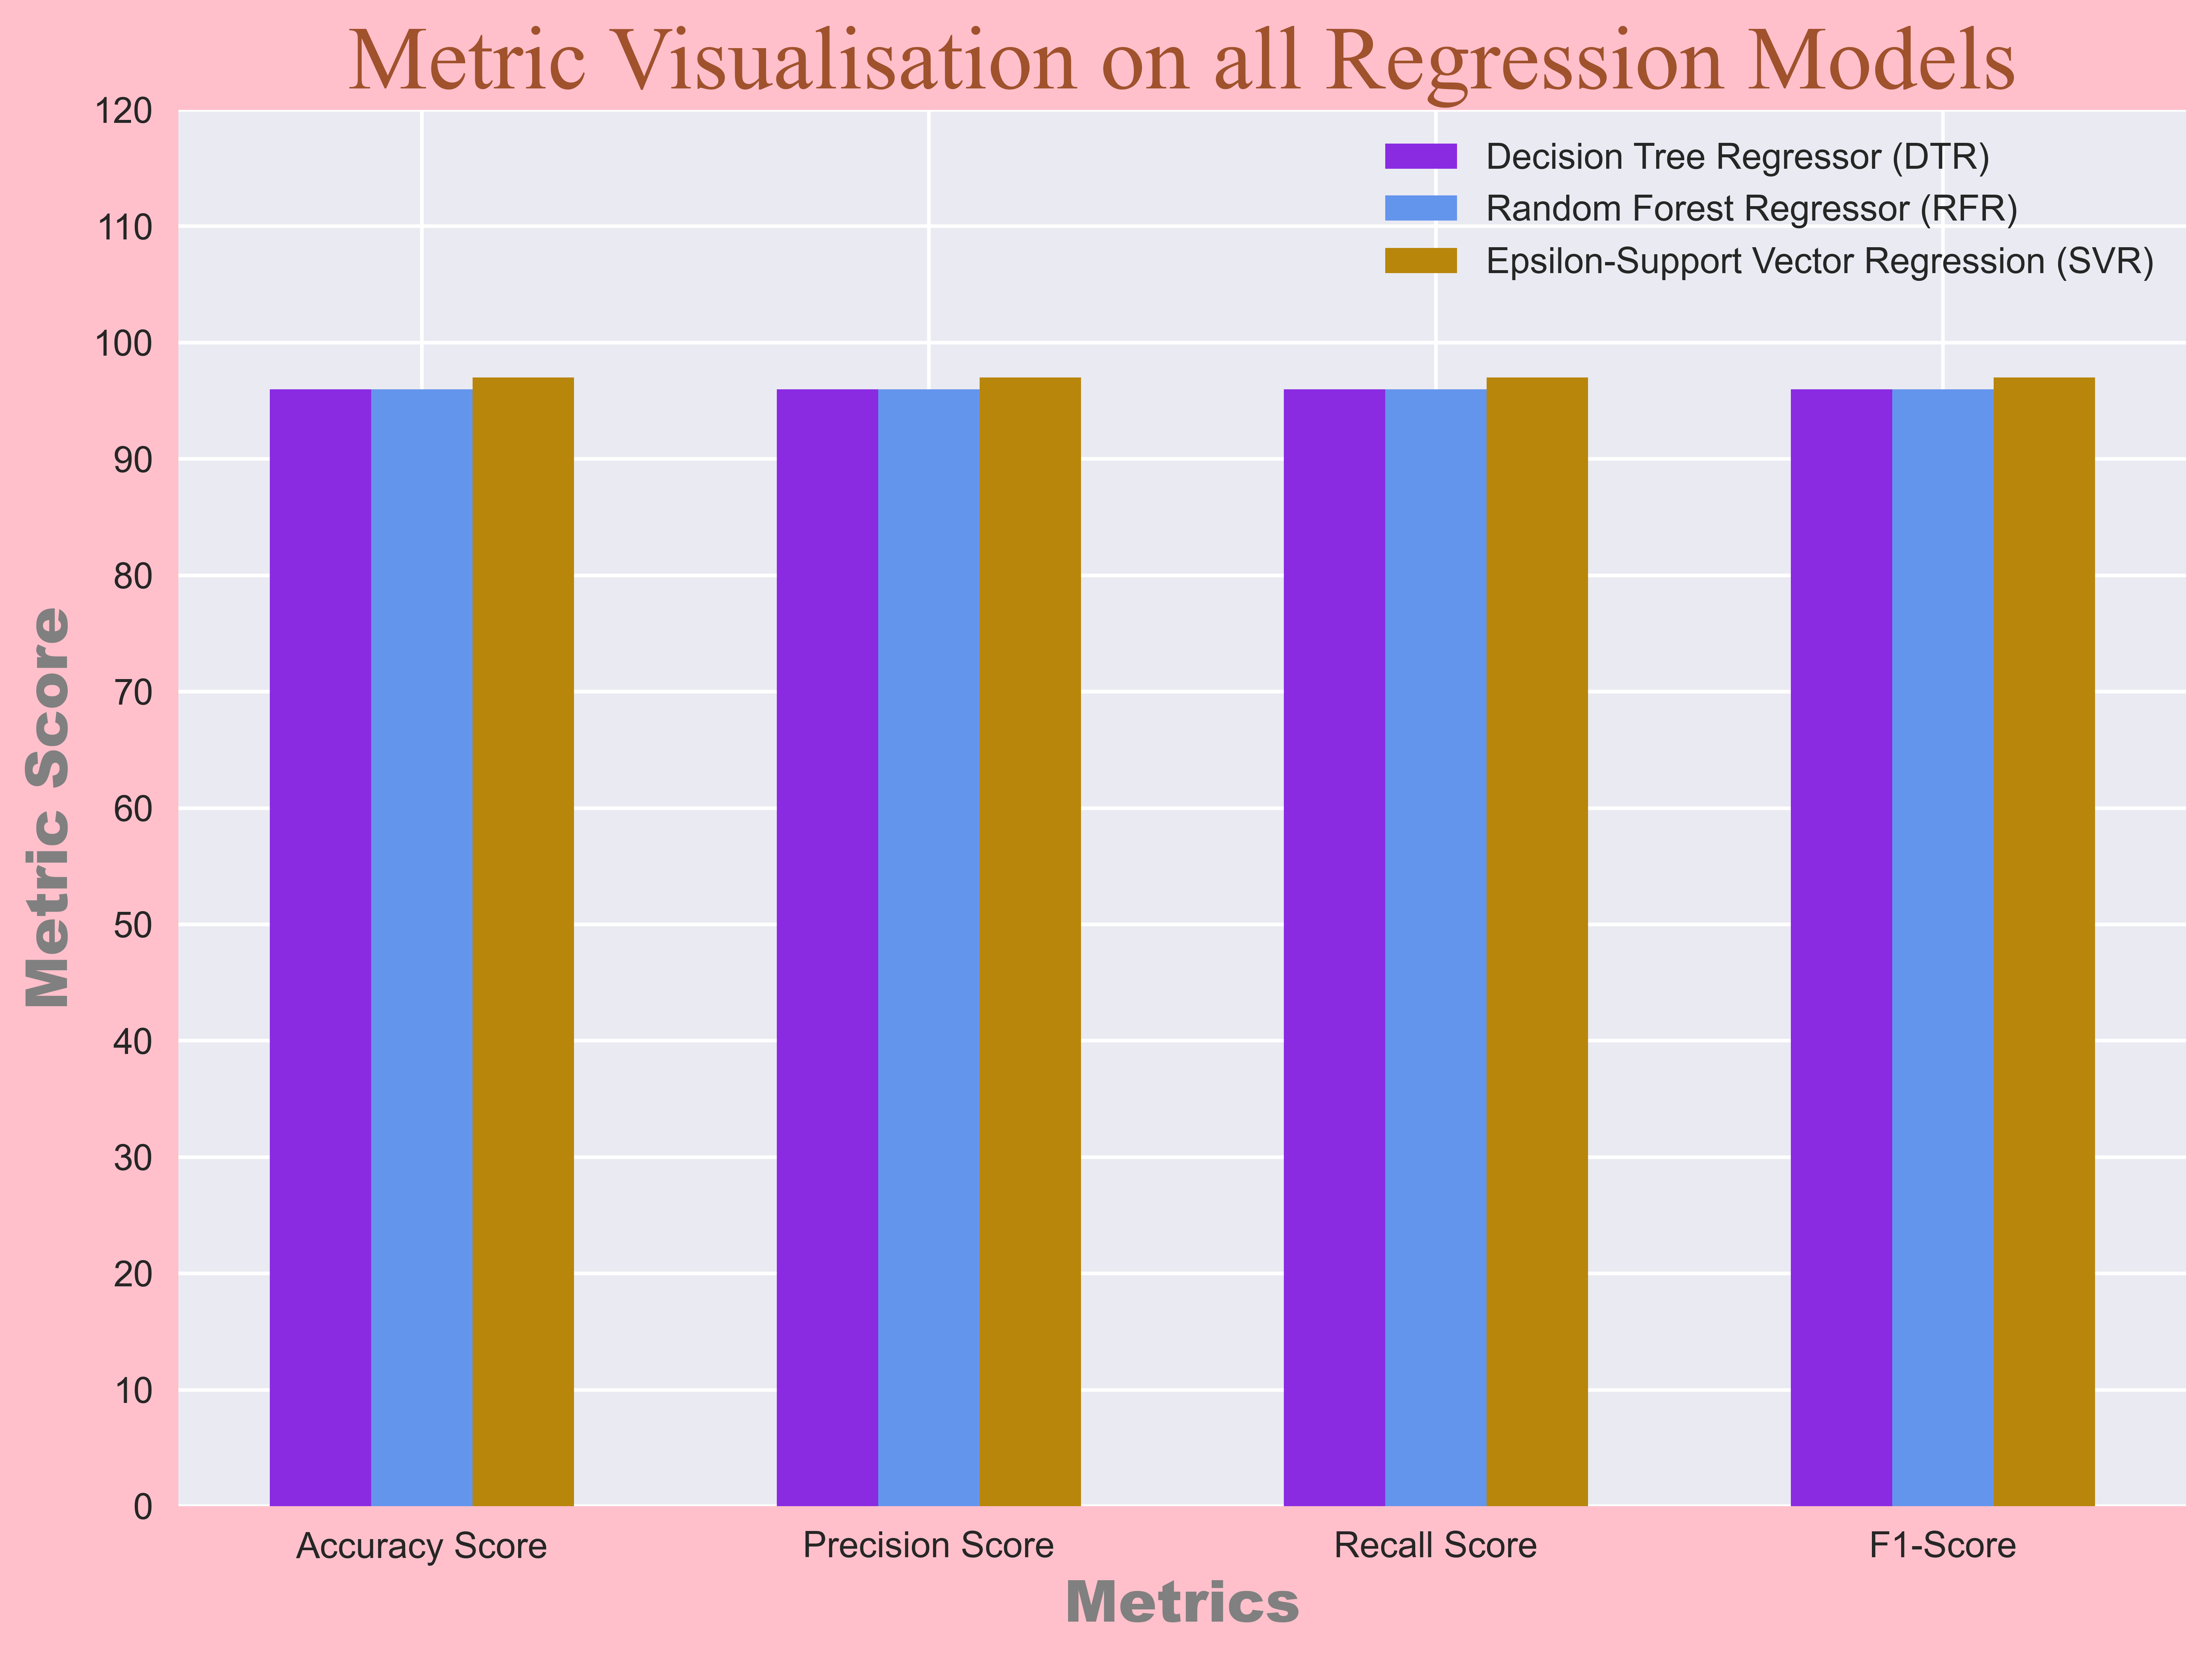

In [ ]:
dtr_scores = (
    int(dtr_accuracy_score),
    int(dtr_precision_score),
    int(dtr_recall_score),
    int(dtr_f1_score)
)
rfr_scores = (
    int(rfr_accuracy_score),
    int(rfr_precision_score),
    int(rfr_recall_score),
    int(rfr_f1_score)
)
svr_scores = (
    int(svr_accuracy_score),
    int(svr_precision_score),
    int(svr_recall_score),
    int(svr_f1_score)
)
x_grid = ["Accuracy Score", "Precision Score", "Recall Score", "F1-Score"]
y_grid = [value for value in range(0, 125, 10)]
xpos = np.arange(len(x_grid))
bar_width = .2

style.use("seaborn-v0_8")
plt.figure(figsize=(10, 7), dpi=700, facecolor="pink")
plt.title(  # Add a title to the graph (specify font parameters with the Argument: fontdict).
    "Metric Visualisation on all Regression Models",
    fontdict={
        "fontname": "Times New Roman",
        "fontsize": 25
    },
    color="sienna"
)
plt.bar(xpos, dtr_scores, width=bar_width, color="blueviolet", label="Decision Tree Regressor (DTR)")
plt.bar(
    (xpos + 0.2), rfr_scores, width=bar_width, color="cornflowerblue", label="Random Forest Regressor (RFR)"
)
plt.bar(
    (xpos + 0.4), svr_scores, width=bar_width, color="darkgoldenrod",
    label="Epsilon-Support Vector Regression (SVR)"
)
plt.xlabel(  # Just like the "Function: plt.title()", this gives a title to the X-Axis.
    "Metrics",
    fontdict={
        "fontname": "Arial Black",
        "fontsize": 16
    },
    color="grey"
)
plt.xticks((xpos + 0.2), x_grid)
plt.ylabel(  # Just like the "Function: plt.title()", this gives a title to the Y-Axis.
    "Metric Score",
    fontdict={
        "fontname": "Arial Black",
        "fontsize": 16
    },
    color="grey"
)
plt.yticks(y_grid)
plt.legend()
plt.show()

<br>
<br>

## __<center><u>Implementing Classifier Models</u></center>__

### _(1): Decision Tree Classifier_

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(features_train, labels_train)

dtc_prediction = dtc.predict(features_test)
dtc_accuracy_score = accuracy_score(labels_test, dtc_prediction) * 100
dtc_precision_score = precision_score(labels_test, dtc_prediction, average="weighted") * 100
dtc_recall_score = recall_score(labels_test, dtc_prediction, average="weighted") * 100
dtc_f1_score = f1_score(labels_test, dtc_prediction, average="weighted") * 100

print("Evaluation for Decision Tree Classifier".center(55, '_'))
print("Model Type:" + "\t", dtc)
print("Prediction:" + "\t", dtc_prediction)
print('-' * 55)

print("Accuracy Score:" + "\t", "{dtc_accuracy:.6f}%".format(dtc_accuracy=dtc_accuracy_score))
print("Precision Score:", "{dtc_precision:.6f}%".format(dtc_precision=dtc_precision_score))
print("Recall Score:" + "\t", "{dtc_recall:.6f}%".format(dtc_recall=dtc_recall_score))
print("F1-Scoe:" + "\t", "{dtc_f1:.6f}%".format(dtc_f1=dtc_f1_score))
print('-' * 55)

________Evaluation for Decision Tree Classifier________
Model Type:	 DecisionTreeClassifier()
Prediction:	 [0 0 0 ... 0 0 0]
-------------------------------------------------------
Accuracy Score:	 96.291866%
Precision Score: 96.278918%
Recall Score:	 96.291866%
F1-Scoe:	 96.285126%
-------------------------------------------------------


In [ ]:
print("Confusion Matrix for Decision Tree Classifier - 'Labels Test' & 'Prediction':")
print('_' * 80)
print(confusion_matrix(labels_test, dtc_prediction))

Confusion Matrix for Decision Tree Classifier - 'Labels Test' & 'Prediction':
________________________________________________________________________________
[[1410   30]
 [  32  200]]


In [ ]:
print("Classification Report for Decision Tree Classifier - 'Labels Test' & 'Prediction':")
print('_' * 85)
print(classification_report(labels_test, dtc_prediction))

Classification Report for Decision Tree Classifier - 'Labels Test' & 'Prediction':
_____________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1440
           1       0.87      0.86      0.87       232

    accuracy                           0.96      1672
   macro avg       0.92      0.92      0.92      1672
weighted avg       0.96      0.96      0.96      1672



<br>

### _(2): Random Forest Classifier_

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(features_train, labels_train)

rfc_prediction = rfc.predict(features_test)
rfc_accuracy_score = accuracy_score(labels_test, rfc_prediction) * 100
rfc_precision_score = precision_score(labels_test, rfc_prediction, average="weighted") * 100
rfc_recall_score = recall_score(labels_test, rfc_prediction, average="weighted") * 100
rfc_f1_score = f1_score(labels_test, rfc_prediction, average="weighted") * 100

print("Evaluation for Random Forest Classifier".center(55, '_'))
print("Model Type:" + "\t", rfc)
print("Prediction:" + "\t", rfc_prediction)
print('-' * 55)

print("Accuracy Score:" + "\t", "{rfc_accuracy:.6f}%".format(rfc_accuracy=rfc_accuracy_score))
print("Precision Score:", "{rfc_precision:.6f}%".format(rfc_precision=rfc_precision_score))
print("Recall Score:" + "\t", "{rfc_recall:.6f}%".format(rfc_recall=rfc_recall_score))
print("F1-Score:" + "\t", "{rfc_f1:.6f}%".format(rfc_f1=rfc_f1_score))
print('-' * 55)

________Evaluation for Random Forest Classifier________
Model Type:	 RandomForestClassifier()
Prediction:	 [0 0 0 ... 0 0 0]
-------------------------------------------------------
Accuracy Score:	 97.727273%
Precision Score: 97.785705%
Recall Score:	 97.727273%
F1-Score:	 97.640705%
-------------------------------------------------------


In [ ]:
print("Confusion Matrix for Random Forest Classifier - 'Labels Test' & 'Prediction':")
print('_' * 80)
print(confusion_matrix(labels_test, rfc_prediction))

Confusion Matrix for Random Forest Classifier - 'Labels Test' & 'Prediction':
________________________________________________________________________________
[[1440    0]
 [  38  194]]


In [ ]:
print("Classification Report for Random Forest Classifier - 'Labels Test' & 'Prediction':")
print('_' * 85)
print(classification_report(labels_test, rfc_prediction))

Classification Report for Random Forest Classifier - 'Labels Test' & 'Prediction':
_____________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1440
           1       1.00      0.84      0.91       232

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



<br>

### _(3): C-Support Vector Classification - SVC_

In [ ]:
svc = SVC()

svc.fit(features_train, labels_train)

svc_prediction = svc.predict(features_test)
svc_accuracy_score = accuracy_score(labels_test, svc_prediction) * 100
svc_precision_score = precision_score(labels_test, svc_prediction, average="weighted") * 100
svc_recall_score = recall_score(labels_test, svc_prediction, average="weighted") * 100
svc_f1_score = f1_score(labels_test, svc_prediction, average="weighted") * 100

print("Evaluation for C-Support Vector Classification (SVC)".center(65, '_'))
print("Model Type:" + "\t", svc)
print("Prediciton:" + "\t", svc_prediction)
print('-' * 65)

print("Accuracy Score:" + "\t", "{svc_accuracy:.6f}%".format(svc_accuracy=svc_accuracy_score))
print("Precision Score:", "{svc_precision:.6f}%".format(svc_precision=svc_precision_score))
print("Recall Score:" + "\t", "{svc_recall:.6f}%".format(svc_recall=svc_recall_score))
print("F1-Score:" + "\t", "{svc_f1:.6f}%".format(svc_f1=svc_f1_score))
print('-' * 65)

_______Evaluation for C-Support Vector Classification (SVC)______
Model Type:	 SVC()
Prediciton:	 [0 0 0 ... 0 0 0]
-----------------------------------------------------------------
Accuracy Score:	 97.188995%
Precision Score: 97.257972%
Recall Score:	 97.188995%
F1-Score:	 97.059669%
-----------------------------------------------------------------


In [ ]:
print("Confusion Matrix for C-Support Vector Classification (SVC) - 'Labels Test' & 'Prediction':")
print('_' * 93)
print(confusion_matrix(labels_test, svc_prediction))

Confusion Matrix for C-Support Vector Classification (SVC) - 'Labels Test' & 'Prediction':
_____________________________________________________________________________________________
[[1439    1]
 [  46  186]]


In [ ]:
print("Classification Report for C-Support Vector Classification (SVC) - 'Labels Test' & 'Prediction':")
print('_' * 99)
print(classification_report(labels_test, svc_prediction))

Classification Report for C-Support Vector Classification (SVC) - 'Labels Test' & 'Prediction':
___________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1440
           1       0.99      0.80      0.89       232

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



<br>

## __<center><u>Visualising the Metric Scores for all Classifier Models</u></center>__

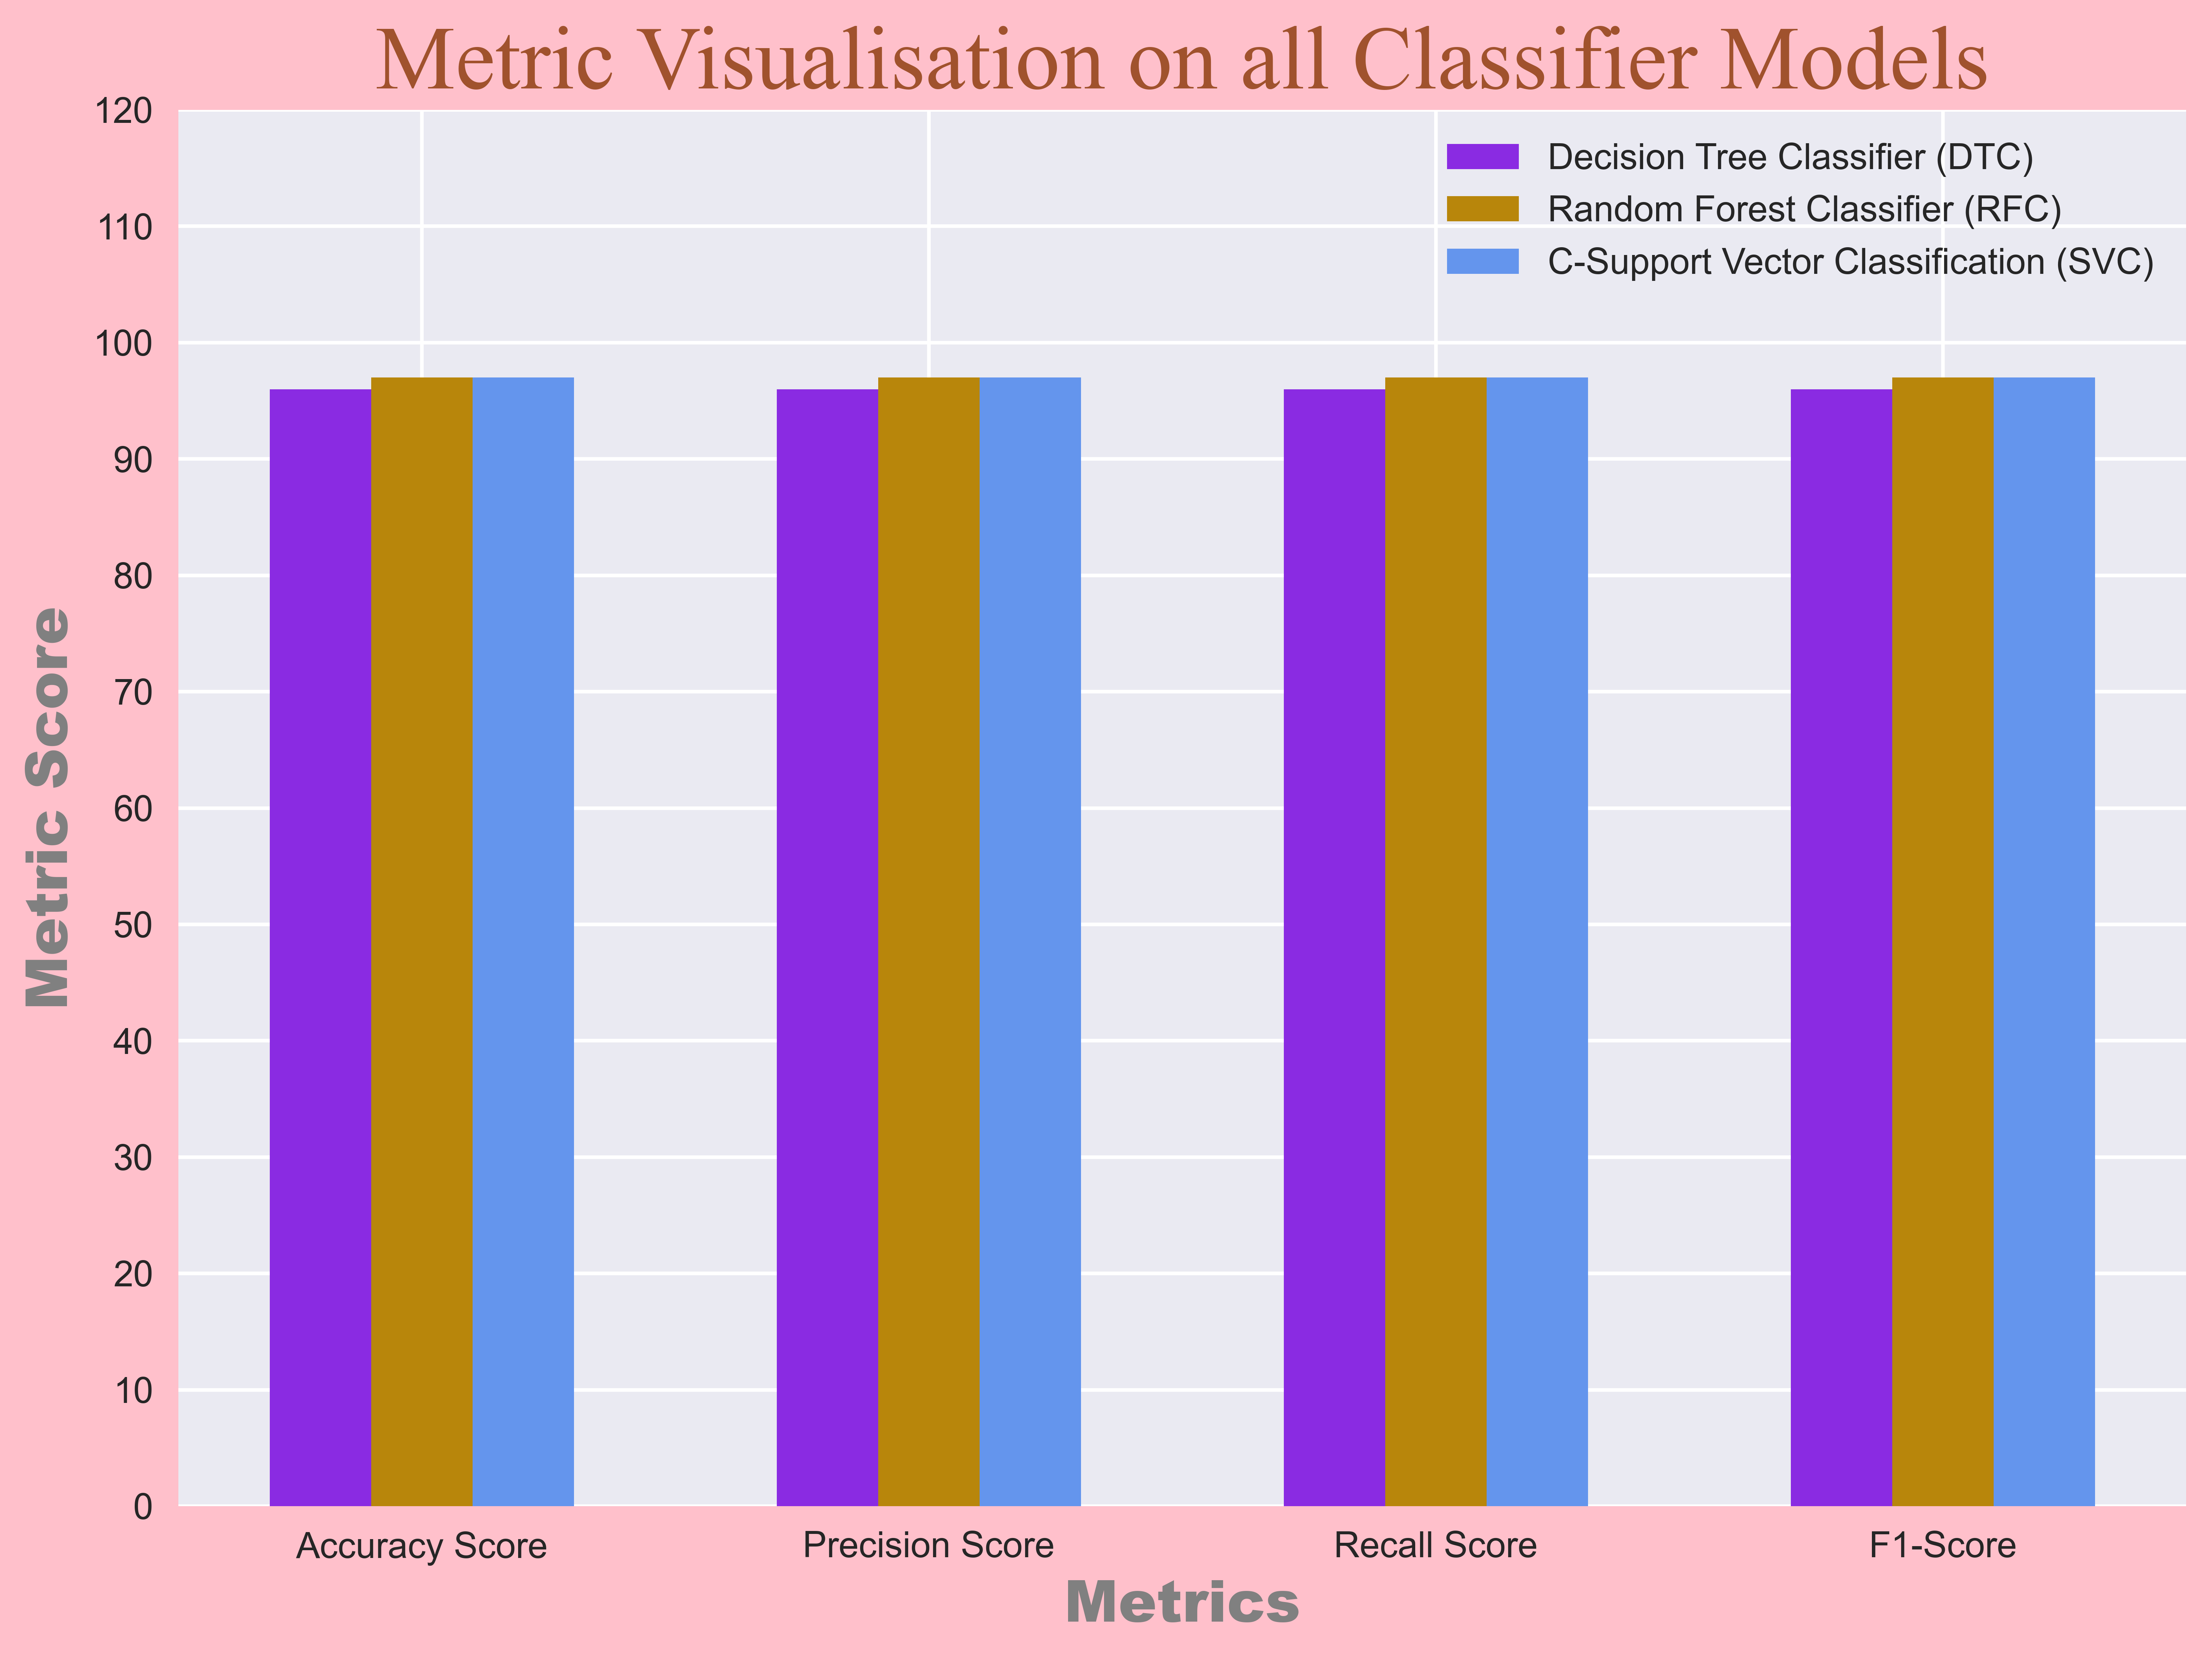

In [ ]:
svc_scores = (
    int(svc_accuracy_score),
    int(svc_precision_score),
    int(svc_recall_score),
    int(svc_f1_score)
)
dtc_scores = (
    int(dtc_accuracy_score),
    int(dtc_precision_score),
    int(dtc_recall_score),
    int(dtc_f1_score)
)
rfc_scores = (
    int(rfc_accuracy_score),
    int(rfc_precision_score),
    int(rfc_recall_score),
    int(rfc_f1_score)
)
x_grid = ["Accuracy Score", "Precision Score", "Recall Score", "F1-Score"]
y_grid = [value for value in range(0, 125, 10)]
xpos = np.arange(len(x_grid))
bar_width = .2

style.use("seaborn-v0_8")
plt.figure(figsize=(10, 7), dpi=700, facecolor="pink")
plt.title(  # Add a title to the graph (specify font parameters with the Argument: fontdict).
    "Metric Visualisation on all Classifier Models",
    fontdict={
        "fontname": "Times New Roman",
        "fontsize": 25
    },
    color="sienna"
)
plt.bar(xpos, dtc_scores, width=bar_width, color="blueviolet", label="Decision Tree Classifier (DTC)")
plt.bar(
    (xpos + 0.2), rfc_scores, width=bar_width, color="darkgoldenrod", label="Random Forest Classifier (RFC)"
)
plt.bar(
    (xpos + 0.4), svc_scores, width=bar_width, color="cornflowerblue",
    label="C-Support Vector Classification (SVC)"
)
plt.xlabel(  # Just like the "Function: plt.title()", this gives a title to the X-Axis.
    "Metrics",
    fontdict={
        "fontname": "Arial Black",
        "fontsize": 16
    },
    color="grey"
)
plt.xticks((xpos + 0.2), x_grid)
plt.ylabel(  # Just like the "Function: plt.title()", this gives a title to the Y-Axis.
    "Metric Score",
    fontdict={
        "fontname": "Arial Black",
        "fontsize": 16
    },
    color="grey"
)
plt.yticks(y_grid)
plt.legend()
plt.show()



#### ___<center><u>Output for the Evaluation Metrics with all Regression Models</u></center>___

|                 Models                  |         Metric Scores         |
|:---------------------------------------:|:-----------------------------:|
| ___Logistic Regression___               | _Accuracy Score: 98.205742%_  |
|                                         | _Precision Score: 98.189846%_ |
|                                         | _Recall Score: 98.205742%_    |
|                                         | _F1-Score: 98.178658%_        |
| ___Ridge___                             | _Accuracy Score: 97.787081%_  |
|                                         | _Precision Score: 97.871260%_ |
|                                         | _Recall Score: 97.787081%_    |
|                                         | _F1-Score: 97.744099%_        |
| ___Epsilon-Support Vector Regression___ | _Accuracy Score: 98.026316%_  |
|                                         | _Precision Score: 98.093254%_ |
|                                         | _Recall Score: 98.026316%_    |
|                                         | _F1-Score: 98.003810%_        |

<br>
<br>

#### ___<center><u>Output for the Evaluation Metrics with all Classification Models</u></center>___

|                 Models                  |         Metric Scores         |
|:---------------------------------------:|:-----------------------------:|
| ___C-Support Vector Classifier___       | _Accuracy Score: 98.086124%_  |
|                                         | _Precision Score: 98.066456%_ |
|                                         | _Recall Score: 98.086124%_    |
|                                         | _F1-Score: 98.057235%_        |
| ___Decision Tree Classifier___          | _Accuracy Score: 97.009569%_  |
|                                         | _Precision Score: 96.962909%_ |
|                                         | _Recall Score: 97.009569%_    |
|                                         | _F1-Score: 96.976078%_        |
| ___Random Forest Classifier___          | _Accuracy Score: 97.428230%_  |
|                                         | _Precision Score: 97.502799%_ |
|                                         | _Recall Score: 97.428230%_    |
|                                         | _F1-Score: 97.315809%_        |



In [ ]:
print("A 100 elements of Decision Tree Regressor Prediction:")
dtr_prediction[:100]

A 100 elements of Decision Tree Regressor Prediction:


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
print("A 100 elements of Random Forest Regressor Prediction:")
rfr_prediction[:100]

A 100 elements of Random Forest Regressor Prediction:


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.68, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.06, 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.07, 1.  , 0.97, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.89, 0.  , 0.  , 0.  , 0.  , 0.21, 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.16, 0.  , 0.  , 0.  , 0.03, 0.02,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 1.  , 0.  , 0.93,
       0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 1.  ,
       0.  , 0.25, 0.  , 0.06, 0.  , 0.  , 0.19, 0.  , 0.  , 0.  , 0.32,
       0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 1.  ,
       0.  ])

In [ ]:
print("A 100 elements of Epsilon-Support Vector Regression Prediction:")
svr_prediction[:100]

A 100 elements of Epsilon-Support Vector Regression Prediction:


array([ 0.11698349, -0.02039512,  0.17198534,  0.10742801, -0.00283561,
        0.0459008 ,  0.07449401,  0.0999933 ,  0.12655346,  0.55677534,
       -0.01312231,  0.14835559,  0.05121726,  0.09556396,  0.02100116,
        0.10023506,  0.1358278 ,  0.21631399,  0.20376893,  0.11377707,
        0.28033469,  0.03756937,  0.74534719,  0.10463684,  0.07481223,
        0.89997954, -0.01309654,  0.07348326,  0.12691581,  0.82628988,
        0.14128666,  0.16681803,  0.12558209,  0.11649612,  0.13078816,
        0.05246356,  0.02985088,  0.70324987,  0.04836089,  0.01981598,
        0.1147567 ,  0.09744418,  0.08736534, -0.00405193,  0.04894533,
        0.21018915,  0.10469484,  0.34824025,  0.07183981,  0.11054115,
        0.17366771,  0.12553002,  0.09270879,  0.18536604,  0.10005807,
        0.09998461,  0.06744237,  0.15169768,  0.05755445,  0.07241833,
        0.10600979,  0.08723128,  0.09204115,  0.87036009,  0.05981099,
        0.91544802,  0.07516604, -0.01489905,  0.11223997,  0.11

<br>

Classifier models that are better at accurately predicting SMS messages include logistic regression, decision trees, random forests, and support vector machines (SVMs). Classifier models, as opposed to regression models, are created expressly to handle categorical data and generate discrete class predictions. They are capable of accurately capturing the patterns and non-linear correlations seen in text data. By utilising methods like text preprocessing, feature extraction, and natural language processing (NLP), classifier models can handle text inputs. These models can better understand the context and semantics of SMS messages by encoding text data into relevant features and employing algorithms designed for classification tasks. This leads to more accurate predictions and fewer incorrect classifications.

In [ ]:
print("A 100 elements of Decision Tree Classifier Prediction:")
dtc_prediction[:100]

A 100 elements of Decision Tree Classifier Prediction:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print("A 100 elements of Random Forest Classifier Prediction:")
rfc_prediction[:100]

A 100 elements of Random Forest Classifier Prediction:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print("A 100 elements of C-Support Vector Classification Prediction:")
svc_prediction[:100]

A 100 elements of C-Support Vector Classification Prediction:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Due to their various underlying mathematical formulations and decision bounds, the binary classification results produced by Support Vector Machines (SVC) and Random Forest (RF) classifiers fall into different ranges. A linear classifier called SVC assigns class labels of either -1 or +1 and measures confidence as a signed distance from the decision border. RF, a group of decision trees, assigns class labels of 0 and 1, and it conveys confidence as probabilities between 0 and 1. The range difference results from this difference in representation, where the range of SVC is between -1 and 0, whereas the range of RF is between 0 and 1 [2].

___Conclusion:___  
This study analysed and assessed six models for detecting SMS spam, the __`Classification Model: SVC`__ emerged as the most successful model. But the other __`Classification Models: Random Forest Classifier and Decision Tree Classifier`__ produced effective outcomes. Even though the Regression models' accuracy was a little bit better, all models showed potential for identifying SMS spam. This study adds to the body of knowledge on SMS spam detection and offers perceptions of the functionality of several methods in this area. Future studies should look into ensemble methods and deep learning algorithms to increase the accuracy of SMS spam detection programmes [1].

In conclusion, the studies conducted for this research showed how well the selected models performed in identifying SMS spam. The findings and conversations provide a thorough analysis of each model's performance, highlighting its advantages and disadvantages. The results imply that some models might be more effective for jobs involving SMS spam detection. In overall, the findings contribute to the field of SMS spam detection and provide insightful information for the creation of more precise and efficient spam detection systems.